In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

fsize = 8
tsize = 8
tdir = 'in'
major = 5.0
minor = 3.0
lwidth = 0.8
lhandle = 2.0
plt.style.use('grid')
# plt.style.use('default')
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['axes.linewidth'] = lwidth
plt.rcParams['legend.handlelength'] = lhandle

# errbar_kwargs = dict(marker='.', markersize=3, capsize=3, elinewidth=1, lw=1)
# plot_kwargs = dict(marker='.', markersize=3, lw=1)
# errband_kwargs = dict(alpha=0.25)
errbar_kwargs = dict(estimator='mean', errorbar=('ci', 95), errwidth=1.25, capsize=0.05,)

save_dir = '../tmlr/figs/experiments'

In [8]:
group_attn_df = pd.read_csv('figure_data/relational_games/group_attn/run_history.csv')

In [9]:
group_attn_df.head()

,group_attn_scores,stripes_loss,acc,_runtime,epoch/loss,epoch/val_loss,group_attn_entropy,epoch/group_attn_entropy,epoch/epoch,epoch/learning_rate,...,n_epochs,val_size,graphlet_size,batch_size,test_split_size,mdipr_rel_dim,early_stopping,entropy_reg_scale,group,name
0,NaN,NaN,NaN,153.914907,0.911476,0.906733,NaN,0.218256,0.0,0.001,...,100,1000,3,512,5000,16,False,0.1,1task_match_patt,L2-dr16-dproj16-symrelTrue-ng8-gattnkey_pos-en...
1,NaN,NaN,NaN,270.279100,0.895847,0.883369,NaN,0.202671,1.0,0.001,...,100,1000,3,512,5000,16,False,0.1,1task_match_patt,L2-dr16-dproj16-symrelTrue-ng8-gattnkey_pos-en...
2,NaN,NaN,NaN,386.641130,0.870758,0.858822,NaN,0.177574,2.0,0.001,...,100,1000,3,512,5000,16,False,0.1,1task_match_patt,L2-dr16-dproj16-symrelTrue-ng8-gattnkey_pos-en...
3,NaN,NaN,NaN,503.064556,0.848588,0.839146,NaN,0.155408,3.0,0.001,...,100,1000,3,512,5000,16,False,0.1,1task_match_patt,L2-dr16-dproj16-symrelTrue-ng8-gattnkey_pos-en...
4,NaN,NaN,NaN,619.560608,0.830956,0.823040,NaN,0.137783,4.0,0.001,...,100,1000,3,512,5000,16,False,0.1,1task_match_patt,L2-dr16-dproj16-symrelTrue-ng8-gattnkey_pos-en...


In [10]:
group_attn_df.columns

Index(['group_attn_scores', 'stripes_loss', 'acc', '_runtime', 'epoch/loss',
       'epoch/val_loss', 'group_attn_entropy', 'epoch/group_attn_entropy',
       'epoch/epoch', 'epoch/learning_rate', 'hexos_group_attn_entropy',
       'epoch/acc', 'stripes_group_attn_entropy', '_step', 'hexos_acc',
       'hexos_loss', 'loss', 'epoch/val_group_attn_entropy', '_timestamp',
       'stripes_acc', 'epoch/val_acc', 'learning_rate', 'entropy_reg',
       'run_name', 'wandb_project_name', 'n_groups', 'n_filters', 'seed',
       'symmetric_inner_prod', 'two_layer', 'train_size', 'mdipr_proj_dim',
       'group_attn_key', 'ignore_gpu_assert', 'mdipr_symmetric',
       'group_attn_key_dim', 'train_split', 'test_size', 'task', 'n_epochs',
       'val_size', 'graphlet_size', 'batch_size', 'test_split_size',
       'mdipr_rel_dim', 'early_stopping', 'entropy_reg_scale', 'group',
       'name'],
      dtype='object')

In [28]:
group_attn_df['Group Attention Entropy'] = group_attn_df['epoch/val_group_attn_entropy'] / group_attn_df['entropy_reg_scale']
group_attn_df['Cross Entropy Loss'] = group_attn_df['epoch/val_loss'] - group_attn_df['epoch/val_group_attn_entropy']

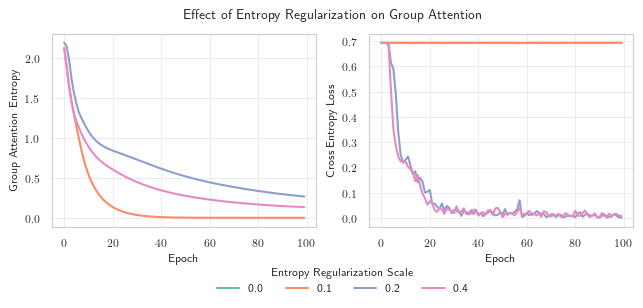

In [59]:
fig_data = group_attn_df.copy()
fig_data = fig_data[fig_data.mdipr_rel_dim == 16]
fig_data.rename(columns={'epoch/epoch': 'Epoch', 'entropy_reg_scale': 'Entropy Regularization Scale'}, inplace=True)


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(2.5*3, 2.5))
sns.lineplot(x='Epoch', y='Group Attention Entropy', hue='Entropy Regularization Scale', palette=sns.color_palette("Set2", 4),
    data=fig_data, ax=ax1, legend=False)
sns.lineplot(x='Epoch', y='Cross Entropy Loss', hue='Entropy Regularization Scale', palette=sns.color_palette("Set2", 4),
    data=fig_data, ax=ax2)
# sns.move_legend(ax1, "center right")
sns.move_legend(ax2, "lower center", ncol=4, bbox_to_anchor=(-0.1, -0.4), frameon=False)
fig.suptitle('Effect of Entropy Regularization on Group Attention');


In [60]:
fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/group_attn_entropy.pdf')